# Семинар 14. Pandas_2

        
4. Операции над таблицами
    
    4.2. Агрегирование `sum, mean, min, ...`
        
    4.3. Применение функций `numpy`
    
    4.4. Добавление/удаление строк/столбцов, склеивание таблиц

    4.5. Группировка `groupby`
    
    4.6. Слияние `merge`
    
    
5. Сохранение в файл

## Pandas Cheat Sheet

https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

## Python Data Science Handbook

https://jakevdp.github.io/PythonDataScienceHandbook/

In [2]:
import pandas as pd

import numpy as np

## Агрегирование

**Выполняется отдельно для каждого столбца (по-умолчанию)**

Методы `DataFrame`:

- `df.sum(...)` - сумма
- `df.mean(...)` - среднее
- `df.cumsum(...)` - накопленная сумма
- и др.


### Метод **`agg`**:

- `df.agg(func=None, axis=0, *args, **kwargs)`
- `df.aggregate(func=None, axis=0, *args, **kwargs)`

`func:function, str, list or dict`:
- ссылка на функцию
- имя функции (строка)
- список ссылок на функции
- список имен функций (строк)
- словарь {индекс:функция} или {столбец:функция} (индекс/столбец задается аргументом `axis`)

Возвращают `scalar`, `Series`, `DataFrame`

In [3]:
url = 'https://github.com/BoberSA/PythonCourse/raw/master/Lecture_6/grades.csv'
df = pd.read_csv(url, index_col=0)

In [5]:
df.head()

,hash,0,1,2,3,4,5,6,7,8
0,cbe32a2a1b,0.8,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,caa93590ad,0.2,0.2,0.9,0.7,0.0,0.0,0.0,0.0,0.0
2,5bbe47f96d,0.8,1.0,1.0,1.0,1.0,0.0,0.5,0.0,0.0
3,3f187965b9,0.0,0.0,0.8,1.0,0.5,0.0,0.0,0.0,0.0
4,bf1e56e185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df.mean()

0    0.407895
1    0.718421
2    0.660526
3    0.689474
4    0.389474
5    0.197368
6    0.171053
7    0.073684
8    0.260526
dtype: float64

In [9]:
df.iloc[:, 1:].agg(['mean', 'std'], axis=1)

,mean,std
0,0.644444,0.487625
1,0.222222,0.341971
2,0.588889,0.470225
3,0.255556,0.403457
4,0.000000,0.000000
5,0.255556,0.316667
6,0.655556,0.406544
7,0.577778,0.460374
8,0.211111,0.337062
9,0.322222,0.366667


In [10]:
df.agg(['mean', 'std', max])

,hash,0,1,2,3,4,5,6,7,8
max,f9f854aa44,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,0.700000
mean,NaN,0.407895,0.718421,0.660526,0.689474,0.389474,0.197368,0.171053,0.073684,0.260526
std,NaN,0.392760,0.389633,0.444510,0.407225,0.343896,0.327552,0.240391,0.255411,0.327595


## Применение функций `numpy`

- `Series` воспринимается `numpy` как одномерный массив
- `DataFrame` воспринимается `numpy` как двумерный массив

In [11]:
np.mean(df['0'])

0.40789473684210525

In [13]:
df.iloc[0, 1:]

0    0.8
1      1
2      1
3      1
4      1
5      1
6      0
7      0
8      0
Name: 0, dtype: object

In [12]:
np.linalg.norm(df.iloc[0, 1:], ord=np.inf)

1.0

In [123]:
np.max(df)

hash    f9f854aa44
0                1
1                1
2                1
3                1
4                1
5                1
6              0.5
7                1
8              0.7
dtype: object

In [124]:
np.linalg.norm(df.iloc[:,1:], axis=0)

array([3.46842904, 5.02294734, 4.88773976, 4.91934955, 3.18433667,
       2.33452351, 1.80277564, 1.61864141, 2.55929678])

In [125]:
np.log(df.iloc[:,1:]+1)

,0,1,2,3,4,5,6,7,8
0,0.587787,0.693147,0.693147,0.693147,0.693147,0.693147,0.000000,0.000000,0.000000
1,0.182322,0.182322,0.641854,0.530628,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.587787,0.693147,0.693147,0.693147,0.693147,0.000000,0.405465,0.000000,0.000000
3,0.000000,0.000000,0.587787,0.693147,0.405465,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.405465,0.587787,0.405465,0.405465,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.641854,0.693147,0.693147,0.693147,0.587787,0.000000,0.405465,0.000000,0.530628
7,0.587787,0.000000,0.693147,0.641854,0.693147,0.693147,0.405465,0.000000,0.000000
8,0.000000,0.641854,0.000000,0.405465,0.405465,0.000000,0.000000,0.000000,0.000000
9,0.587787,0.693147,0.000000,0.182322,0.405465,0.182322,0.000000,0.000000,0.182322


## Добавление/удаление строк/столбцов, склеивание таблиц

Добавление:

- `df[новый_столбец] = выражение` - изменяет df
- `df.assign(столбец1 = выражение1, столбец2 = выражение2, ...)` - создает измененную копию df

Удаление:

- `df.drop(columns=[столбцы])`
- `df.drop(index=[строки])`

- `del df[столбец]`

Склеивание:

- `pd.concat([df1, df2, ...], axis=0)`

In [6]:
df.head()

,hash,0,1,2,3,4,5,6,7,8
0,cbe32a2a1b,0.8,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,caa93590ad,0.2,0.2,0.9,0.7,0.0,0.0,0.0,0.0,0.0
2,5bbe47f96d,0.8,1.0,1.0,1.0,1.0,0.0,0.5,0.0,0.0
3,3f187965b9,0.0,0.0,0.8,1.0,0.5,0.0,0.0,0.0,0.0
4,bf1e56e185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df['9'] = np.clip(df['8'] + 0.5, 0, 1)
df.head()

,hash,0,1,2,3,4,5,6,7,8,9
0,cbe32a2a1b,0.8,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.5
1,caa93590ad,0.2,0.2,0.9,0.7,0.0,0.0,0.0,0.0,0.0,0.5
2,5bbe47f96d,0.8,1.0,1.0,1.0,1.0,0.0,0.5,0.0,0.0,0.5
3,3f187965b9,0.0,0.0,0.8,1.0,0.5,0.0,0.0,0.0,0.0,0.5
4,bf1e56e185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5


In [16]:
df2 = df.iloc[:,1:].assign(avg = lambda x: np.mean(x, axis=1), 
                           exam = lambda x: x['avg'] < 0.5)
df2.head()

,0,1,2,3,4,5,6,7,8,9,avg,exam
0,0.8,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.5,0.63,False
1,0.2,0.2,0.9,0.7,0.0,0.0,0.0,0.0,0.0,0.5,0.25,True
2,0.8,1.0,1.0,1.0,1.0,0.0,0.5,0.0,0.0,0.5,0.58,False
3,0.0,0.0,0.8,1.0,0.5,0.0,0.0,0.0,0.0,0.5,0.28,True
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.05,True


In [129]:
df.head()

,hash,0,1,2,3,4,5,6,7,8,9
0,cbe32a2a1b,0.8,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.5
1,caa93590ad,0.2,0.2,0.9,0.7,0.0,0.0,0.0,0.0,0.0,0.5
2,5bbe47f96d,0.8,1.0,1.0,1.0,1.0,0.0,0.5,0.0,0.0,0.5
3,3f187965b9,0.0,0.0,0.8,1.0,0.5,0.0,0.0,0.0,0.0,0.5
4,bf1e56e185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5


In [24]:
pd.concat([df.hash, df2], axis=1)

,hash,0,1,2,3,4,5,6,7,8,9,avg,exam
0,cbe32a2a1b,0.8,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.5,0.63,False
1,caa93590ad,0.2,0.2,0.9,0.7,0.0,0.0,0.0,0.0,0.0,0.5,0.25,True
2,5bbe47f96d,0.8,1.0,1.0,1.0,1.0,0.0,0.5,0.0,0.0,0.5,0.58,False
3,3f187965b9,0.0,0.0,0.8,1.0,0.5,0.0,0.0,0.0,0.0,0.5,0.28,True
4,bf1e56e185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.05,True
5,7ca01c996f,0.5,0.8,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.5,0.28,True
6,2a5a018502,0.9,1.0,1.0,1.0,0.8,0.0,0.5,0.0,0.7,1.0,0.69,False
7,99fe117fcb,0.8,0.0,1.0,0.9,1.0,1.0,0.5,0.0,0.0,0.5,0.57,False
8,6875ba52f0,0.0,0.9,0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.5,0.24,True
9,1eea619f12,0.8,1.0,0.0,0.2,0.5,0.2,0.0,0.0,0.2,0.7,0.36,True


## `groupby`

- Позволяет сгруппировать строки по одинаковым значениям в столбце.
- Цель группировки - применить аггрегирование к каждой группе строк отдельно.
- Возвращает объект класса `DataFrameGroupBy`.

Синтаксис:

`df.groupby(by=None, axis=0, ...)`

`by:mapping, function, label, or list of labels` - та сущность, по которой нужно сгруппировать

- название столбца/строки
- список названий столбцов/строк
- словарь
- функция (которая будет применена к индексу или названиям столбцов)
- массив


In [7]:
df = pd.read_csv('full.csv', index_col=0)

In [8]:
df.head()

,Группа,Фамилия,Имя,Отчество,hash,0,1,2,3,4,5,6,7,8
0,БПМ-161,Антонов,Алексей,Алексеевич,6875ba52f0,0.0,0.9,0.0,0.5,0.5,0.0,0.0,0.0,0.0
1,БПМ-161,Арсамакова,Алина,Ибрагимовна,7ca01c996f,0.5,0.8,0.5,0.5,0.0,0.0,0.0,0.0,0.0
2,БПМ-161,Богатов,Антон,Юрьевич,15360bcc4c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,БПМ-161,Бычков,Андрей,-,f9f854aa44,1.0,0.9,0.0,0.5,0.5,0.0,0.0,0.0,0.0
4,БПМ-161,Гончаров,Глеб,Игоревич,3f187965b9,0.0,0.0,0.8,1.0,0.5,0.0,0.0,0.0,0.0


In [91]:
df[['Группа', '0', '1']].groupby('Группа').max()

,0,1
Группа,,
БПМ-161,1.0,1.0
БПМ-162,0.9,1.0
БПМ-163,0.2,1.0


In [92]:
df.groupby(['0']).mean()

,1,2,3,4,5,6,7,8
0,,,,,,,,
0.0,0.575000,0.537500,0.562500,0.218750,0.15625,0.0625,0.000000,0.16875
0.2,0.433333,0.933333,0.800000,0.333333,0.00000,0.0000,0.000000,0.00000
0.5,0.500000,0.750000,0.750000,0.250000,0.10000,0.2500,0.000000,0.10000
0.8,0.926667,0.746667,0.786667,0.566667,0.32000,0.3000,0.186667,0.42000
0.9,1.000000,1.000000,1.000000,0.800000,0.00000,0.5000,0.000000,0.70000
1.0,0.900000,0.000000,0.500000,0.500000,0.00000,0.0000,0.000000,0.00000


In [93]:
df01 = df.groupby(['0', '1']).mean()
df01

2         3         4         5         6         7         8
0   1                                                                        
0.0 0.0  0.360000  0.400000  0.100000  0.000000  0.000000  0.000000  0.000000
    0.5  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
    0.6  1.000000  1.000000  1.000000  0.500000  0.000000  0.000000  0.700000
    0.7  1.000000  1.000000  0.000000  0.250000  0.000000  0.000000  0.000000
    0.8  0.000000  0.700000  0.500000  0.000000  0.000000  0.000000  0.000000
    0.9  0.000000  0.500000  0.500000  0.000000  0.000000  0.000000  0.000000
    1.0  0.760000  0.560000  0.200000  0.300000  0.200000  0.000000  0.400000
0.2 0.2  0.900000  0.700000  0.000000  0.000000  0.000000  0.000000  0.000000
    0.9  1.000000  1.000000  1.000000  0.000000  0.000000  0.000000  0.000000
0.5 0.2  1.000000  1.000000  0.500000  0.200000  0.500000  0.000000  0.200000
    0.8  0.500000  0.500000  0.000000  0.000000  0.000000  0.000000  0.000000
0.8 0.0  1.000000  0.900000  1.000000  1.000000  0.500000  0.000000  0.000000
    0.9  0.000000  0.000000  0.500000  0.500000  0.000000  1.000000  0.600000
    1.0  0.784615  0.838462  0.538462  0.253846  0.307692  0.138462  0.438462
0.9 1.0  1.000000  1.000000  0.800000  0.000000  0.500000  0.000000  0.700000
1.0 0.9  0.000000  0.500000  0.500000  0.000000  0.000000  0.000000  0.000000

In [94]:
df01.index

MultiIndex([(0.0, 0.0),
            (0.0, 0.5),
            (0.0, 0.6),
            (0.0, 0.7),
            (0.0, 0.8),
            (0.0, 0.9),
            (0.0, 1.0),
            (0.2, 0.2),
            (0.2, 0.9),
            (0.5, 0.2),
            (0.5, 0.8),
            (0.8, 0.0),
            (0.8, 0.9),
            (0.8, 1.0),
            (0.9, 1.0),
            (1.0, 0.9)],
           names=['0', '1'])

In [95]:
df01.loc[(0.0, 0.0):(0.2, 0.9)]

2     3    4     5    6    7    8
0   1                                        
0.0 0.0  0.36  0.40  0.1  0.00  0.0  0.0  0.0
    0.5  0.00  0.00  0.0  0.00  0.0  0.0  0.0
    0.6  1.00  1.00  1.0  0.50  0.0  0.0  0.7
    0.7  1.00  1.00  0.0  0.25  0.0  0.0  0.0
    0.8  0.00  0.70  0.5  0.00  0.0  0.0  0.0
    0.9  0.00  0.50  0.5  0.00  0.0  0.0  0.0
    1.0  0.76  0.56  0.2  0.30  0.2  0.0  0.4
0.2 0.2  0.90  0.70  0.0  0.00  0.0  0.0  0.0
    0.9  1.00  1.00  1.0  0.00  0.0  0.0  0.0

In [96]:
df01.reset_index()

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,0.360000,0.400000,0.100000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.6,1.000000,1.000000,1.000000,0.500000,0.000000,0.000000,0.700000
3,0.0,0.7,1.000000,1.000000,0.000000,0.250000,0.000000,0.000000,0.000000
4,0.0,0.8,0.000000,0.700000,0.500000,0.000000,0.000000,0.000000,0.000000
5,0.0,0.9,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000
6,0.0,1.0,0.760000,0.560000,0.200000,0.300000,0.200000,0.000000,0.400000
7,0.2,0.2,0.900000,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.2,0.9,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
9,0.5,0.2,1.000000,1.000000,0.500000,0.200000,0.500000,0.000000,0.200000


## Задание

Загрузить таблицу из файла `stockholm_td_adj.dat`.

Дать имена столбцам при помощи `df.columns = список имен столбцов`

```
Год   М  Д      Т1      Т2      Т3 D
1800  1  1    -6.1    -6.1    -6.1 1
1800  1  2   -15.4   -15.4   -15.4 1
1800  1  3   -15.0   -15.0   -15.0 1
1800  1  4   -19.3   -19.3   -19.3 1
1800  1  5   -16.8   -16.8   -16.8 1
```

Выбросить ненужный столбец `D`.

Создать столбец `T`, значения которого будут усредненными значениями `T1, T2 и T3`.

Рассчитать по столбцу `T` среднюю температуру:

- Для каждого года
- Для каждого месяца
- Для каждого месяца каждого года


In [ ]:
url = 'https://github.com/jrjohansson/scientific-python-lectures/raw/master/stockholm_td_adj.dat'
df = pd.read_csv(url, header=None, sep='\s+')

In [21]:
df.columns = 'Год   М  Д      Т1      Т2      Т3 D'.split()
df = df.drop(columns=['D'])

In [23]:
df[['Т1', 'Т2', 'Т3']].mean(axis=1)

0        -6.100000
1       -15.400000
2       -15.000000
3       -19.300000
4       -16.800000
           ...    
77426     7.833333
77427     2.133333
77428     4.433333
77429     0.133333
77430    -3.066667
Length: 77431, dtype: float64

In [24]:
df['T'] = df[['Т1', 'Т2', 'Т3']].mean(axis=1)

In [25]:
df.head()

,Год,М,Д,Т1,Т2,Т3,T
0,1800,1,1,-6.1,-6.1,-6.1,-6.1
1,1800,1,2,-15.4,-15.4,-15.4,-15.4
2,1800,1,3,-15.0,-15.0,-15.0,-15.0
3,1800,1,4,-19.3,-19.3,-19.3,-19.3
4,1800,1,5,-16.8,-16.8,-16.8,-16.8


<AxesSubplot:xlabel='Год'>

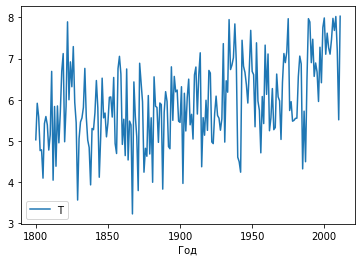

In [28]:
df[['Год', 'T']].groupby(['Год']).mean().plot()

<AxesSubplot:xlabel='Год,М'>

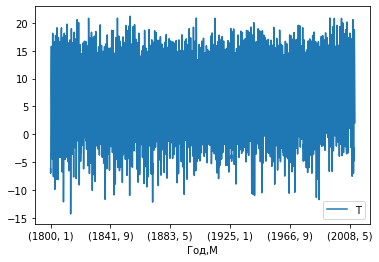

In [27]:
df[['Год', 'М', 'T']].groupby(['Год', 'М']).mean().plot()

<AxesSubplot:xlabel='date'>

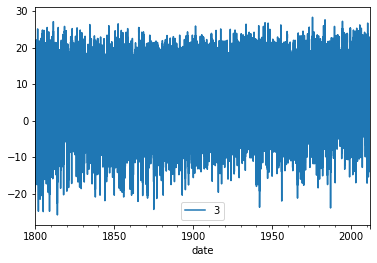

In [14]:
dates = df[0].astype(str).str.cat(df[1].astype(str), sep='-').str.cat(df[2].astype(str), sep='-')
df['date'] = pd.to_datetime(dates)
df.plot(x='date', y=3)

## `merge`

Объединение двух таблиц (аналог `JOIN` в `SQL`).

Синтаксис:

- `left.merge(right, how='inner', on=None, ...)`
- `pd.merge(left, right, how='inner', on=None, ...)`

Аргументы:

- `left` - левая таблица
- `right` - правая таблица
- `on` - название ключевого столбца (можно отдельно указать `left_on` и `right_on`)
- `how` - тип объединения
 
```
    * left: use only keys from left frame, similar to a SQL left outer join;
      preserve key order.
    * right: use only keys from right frame, similar to a SQL right outer join;
      preserve key order.
    * outer: use union of keys from both frames, similar to a SQL full outer
      join; sort keys lexicographically.
    * inner: use intersection of keys from both frames, similar to a SQL inner
      join; preserve the order of the left keys.
```

In [21]:
df1 = pd.DataFrame({  'name':['Александр', 'Сергей', 'Петр', 'Мария', 'Анна'],
                       'age':[         29,       45,     18,      20,     27],
                    'income':[      80000,   150000,  60000,   90000, 100000]})
df1

,name,age,income
0,Александр,29,80000
1,Сергей,45,150000
2,Петр,18,60000
3,Мария,20,90000
4,Анна,27,100000


In [23]:
df2 = pd.DataFrame({ 'name':['Александр', 'Иван', 'Петр', 'Ольга', 'Анна'],
                      'car':[         1,      2,     1,      1,         3],
                    'hobby':['спорт', 'рисование', 'музыка', 'чтение', 'домашние животные']})
df2

,name,car,hobby
0,Александр,1,спорт
1,Иван,2,рисование
2,Петр,1,музыка
3,Ольга,1,чтение
4,Анна,3,домашние животные


In [24]:
pd.merge(df1, df2, on='name', how='inner')

,name,age,income,car,hobby
0,Александр,29,80000,1,спорт
1,Петр,18,60000,1,музыка
2,Анна,27,100000,3,домашние животные


In [25]:
pd.merge(df1, df2, on='name', how='outer')

,name,age,income,car,hobby
0,Александр,29.0,80000.0,1.0,спорт
1,Сергей,45.0,150000.0,NaN,NaN
2,Петр,18.0,60000.0,1.0,музыка
3,Мария,20.0,90000.0,NaN,NaN
4,Анна,27.0,100000.0,3.0,домашние животные
5,Иван,NaN,NaN,2.0,рисование
6,Ольга,NaN,NaN,1.0,чтение


In [50]:
pd.merge(df1, df2, on='name', how='left')

,name,age,income,car,hobby
0,Александр,29,80000,1.0,спорт
1,Сергей,45,150000,NaN,NaN
2,Петр,18,60000,1.0,музыка
3,Мария,20,90000,NaN,NaN
4,Анна,27,100000,3.0,домашние животные


In [51]:
pd.merge(df1, df2, on='name', how='right')

,name,age,income,car,hobby
0,Александр,29.0,80000.0,1,спорт
1,Иван,NaN,NaN,2,рисование
2,Петр,18.0,60000.0,1,музыка
3,Ольга,NaN,NaN,1,чтение
4,Анна,27.0,100000.0,3,домашние животные


## Задание

Загрузить таблицы по ссылкам [`grades.csv`](https://github.com/BoberSA/PythonCourse/raw/master/Lecture_6/grades.csv), [`hashes.csv`](https://github.com/BoberSA/PythonCourse/raw/master/Lecture_6/hashes.csv).

Выполнить все варианты объединения по столбцу `hash`.

Какие типы объединения дают одинаковый результат и почему?


## Сохранение в файл

- `df.to_<format>(path, ...)` - сохранить таблицу в файл указанного формата

`path` - путь к файлу

Например:

- `df.to_csv('table.csv')`
- `df.to_pickle('table.pkl')`
- `df.to_json('table.json')`

Работа с буфером обмена:

- `df.to_clipboard(excel: bool = True, sep: Union[str, NoneType] = None, **kwargs)`

In [52]:
[x for x in dir(df) if x.startswith('to_')]

['to_clipboard',
 'to_csv',
 'to_dict',
 'to_excel',
 'to_feather',
 'to_gbq',
 'to_hdf',
 'to_html',
 'to_json',
 'to_latex',
 'to_markdown',
 'to_numpy',
 'to_parquet',
 'to_period',
 'to_pickle',
 'to_records',
 'to_sql',
 'to_stata',
 'to_string',
 'to_timestamp',
 'to_xarray']

In [26]:
df = pd.read_csv('full.csv', index_col=0)
df.head()

,Группа,Фамилия,Имя,Отчество,hash,0,1,2,3,4,5,6,7,8
0,БПМ-161,Антонов,Алексей,Алексеевич,6875ba52f0,0.0,0.9,0.0,0.5,0.5,0.0,0.0,0.0,0.0
1,БПМ-161,Арсамакова,Алина,Ибрагимовна,7ca01c996f,0.5,0.8,0.5,0.5,0.0,0.0,0.0,0.0,0.0
2,БПМ-161,Богатов,Антон,Юрьевич,15360bcc4c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,БПМ-161,Бычков,Андрей,-,f9f854aa44,1.0,0.9,0.0,0.5,0.5,0.0,0.0,0.0,0.0
4,БПМ-161,Гончаров,Глеб,Игоревич,3f187965b9,0.0,0.0,0.8,1.0,0.5,0.0,0.0,0.0,0.0


In [27]:
df.to_json('full.json')

In [28]:
with open('full.json', 'rt', encoding='utf-8') as f:
    print(f.read()[:500])

{"\u0413\u0440\u0443\u043f\u043f\u0430":{"0":"\u0411\u041f\u041c-161","1":"\u0411\u041f\u041c-161","2":"\u0411\u041f\u041c-161","3":"\u0411\u041f\u041c-161","4":"\u0411\u041f\u041c-161","5":"\u0411\u041f\u041c-161","6":"\u0411\u041f\u041c-161","7":"\u0411\u041f\u041c-161","8":"\u0411\u041f\u041c-161","9":"\u0411\u041f\u041c-161","10":"\u0411\u041f\u041c-161","11":"\u0411\u041f\u041c-161","12":"\u0411\u041f\u041c-161","13":"\u0411\u041f\u041c-161","14":"\u0411\u041f\u041c-161","15":"\u0411\u041f\


In [51]:
import json
with open('full.json', 'rt') as f:
    print(json.load(f).keys())

dict_keys(['Группа', 'Фамилия', 'Имя', 'Отчество', 'hash', '0', '1', '2', '3', '4', '5', '6', '7', '8'])


## Задание

Даны Таблицы:

```
df1 = pd.DataFrame({  'name':['Александр', 'Сергей', 'Петр', 'Мария', 'Анна'],
                       'age':[         29,       45,     18,      20,     27],
                    'income':[      80000,   150000,  60000,   90000, 100000]})
                    
df2 = pd.DataFrame({ 'name':['Александр', 'Иван', 'Петр', 'Ольга', 'Анна'],
                      'car':[         1,      2,     1,      1,         3],
                    'hobby':['спорт', 'рисование', 'музыка', 'чтение', 'домашние животные']})               
```

Дополнить их информацией так, чтобы внешнее (`outer`) объединение не содержало `NaN`.

Сгруппировать по стоблцу `car` и рассчитать средний `income` для каждой группы.

Сохранить результат в файлы двух форматов (на выбор).